In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Simple walks from Bernoulli trials
Number of steps desired in simple random walk: n

In [2]:
n=100

Make an array of your "coin flips" with n elements

In [3]:
x=np.random.binomial(1,.5,n)

Use cumulative sum (cumsum) to add up number of "successes"

In [4]:
s = np.cumsum(x)
s

array([ 0,  0,  0,  0,  0,  1,  2,  3,  4,  4,  4,  5,  6,  6,  7,  8,  8,
        8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 12, 12, 13, 14, 15,
       16, 17, 17, 17, 17, 18, 19, 20, 20, 20, 20, 21, 21, 21, 22, 22, 23,
       23, 24, 25, 25, 26, 27, 27, 27, 27, 27, 27, 28, 28, 28, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 30, 31, 31, 32, 32, 33, 34, 34, 35, 35,
       35, 35, 36, 37, 37, 37, 37, 37, 38, 39, 39, 40, 41, 42, 42])

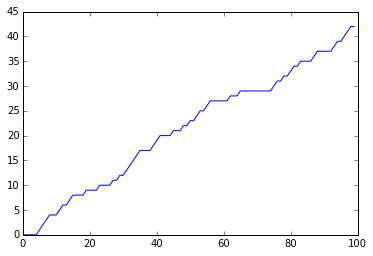

In [5]:
plt.plot(np.arange(n),s)
plt.show()

Clearly this is a bit silly, as outputs of binomial are only 0 or 1. Change outputs to 1, -1 by applying the shift 2x-1 to each entry of x. In Python we can work with arrays elementwise in a nice way!

In [6]:
2*x-1

array([-1, -1, -1, -1, -1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,
        1,  1, -1, -1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1,  1,
       -1,  1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,  1,  1, -1,  1, -1,
       -1, -1,  1,  1, -1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1])

In [7]:
shifteds = np.cumsum(2*x-1)
shifteds

array([ -1,  -2,  -3,  -4,  -5,  -4,  -3,  -2,  -1,  -2,  -3,  -2,  -1,
        -2,  -1,   0,  -1,  -2,  -3,  -2,  -3,  -4,  -5,  -4,  -5,  -6,
        -7,  -6,  -7,  -6,  -7,  -6,  -5,  -4,  -3,  -2,  -3,  -4,  -5,
        -4,  -3,  -2,  -3,  -4,  -5,  -4,  -5,  -6,  -5,  -6,  -5,  -6,
        -5,  -4,  -5,  -4,  -3,  -4,  -5,  -6,  -7,  -8,  -7,  -8,  -9,
        -8,  -9, -10, -11, -12, -13, -14, -15, -16, -17, -16, -15, -16,
       -15, -16, -15, -14, -15, -14, -15, -16, -17, -16, -15, -16, -17,
       -18, -19, -18, -17, -18, -17, -16, -15, -16])

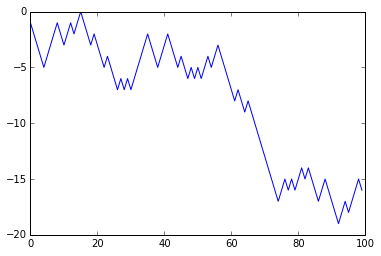

In [8]:
plt.plot(np.arange(n), shifteds)
plt.show()

That's your simple symmetric random walk! Feel free to change the probability of an up step to play with a nonsymmetric version. 

## Modified version of SciPy BrownianMotion Cookbook

brownian() implements one-dimensional Weiner process/Brownian motion. I took most of this code from [the SciPy cookbook page](http://wiki.scipy.org/Cookbook/BrownianMotion), which also has some good discussion of Brownian motion.

In [9]:
from math import sqrt
from scipy.stats import norm

In [11]:
def brownian(x0,n,dt,delta, out=None):
    x0 = np.asarray(x0)
    r = norm.rvs(size=x0.shape + (n,), scale=delta*sqrt(dt))
    if out is None:
        out = np.empty(r.shape)
    np.cumsum(r, axis = -1, out=out)
    out += np.expand_dims(x0, axis = -1)
    return out

Let's just plot one first to see how it works:

In [12]:
newarray = brownian(1,1000,1,1)

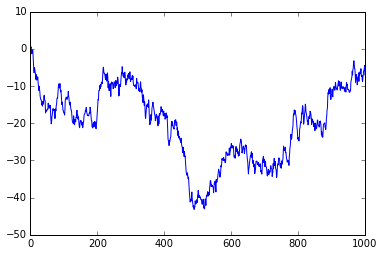

In [13]:
plt.plot(np.arange(len(newarray)), newarray)
plt.show()

Now let's print many:

In [14]:
from pylab import plot, show, grid, xlabel, ylabel

In [15]:
def main():
    # Weiner process parameter
    delta = 2
    # total time
    T = 10.0
    # number of steps
    N = 500
    # time step size
    dt = T/N
    # number of realizations/simulations
    m = 20
    # make empty array to store the simulations
    sims = np.empty((m,N+1))
    # initial values of sims
    sims[:,0] = 10
    
    brownian(sims[:,0],N,dt,delta, out = sims[:,1:])
    t = np.linspace(0.0, N*dt, N+1)
    for k in range(m):
        plt.plot(t, sims[k])
    grid(True)
    plt.show()

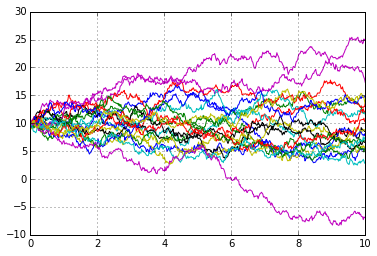

In [16]:
main()

## Just some random walks

In [17]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
# Use the shift 2X-1 to get a symmetric random walk from a binomial with p=1/2
# N is total time, delta is step size (so number of steps is N*delta)
# all steps are still of size one
def RandomWalk(N, delta):
    walk_dist = np.cumsum(2*np.random.binomial(1,.5,N/delta)-1)
    walk_time = np.arange(0,N, delta)
    walk = zip(walk_time, walk_dist)
    return (walk_time, walk_dist)

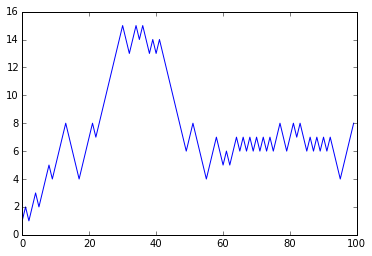

In [166]:
this_walk = RandomWalk(100,1)
plt.plot(this_walk[0], this_walk[1])
plt.show()

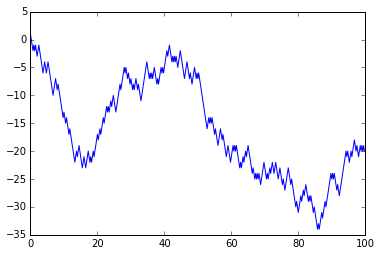

In [167]:
this_walk = RandomWalk(100,.25)
plt.plot(this_walk[0], this_walk[1])
plt.show()

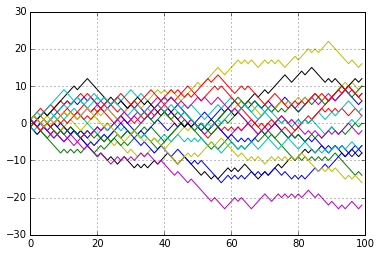

In [168]:
# Let's plot a bunch of such random walks.
endpoints = []
for k in range(20):
    particularWalk = RandomWalk(100,1)
    endpoints.append(particularWalk[1][-1])
    plt.plot(particularWalk[0], particularWalk[1])
grid(True)
plt.show()

(array([ 1.,  1.,  1.,  2.,  2.,  2.,  3.,  4.,  3.,  1.]),
 array([-22. , -18.2, -14.4, -10.6,  -6.8,  -3. ,   0.8,   4.6,   8.4,
         12.2,  16. ]),
 <a list of 10 Patch objects>)

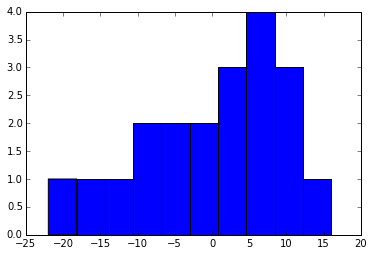

In [169]:
# doesn't look particularly normal, but this is only 20 random walks
plt.hist(endpoints)

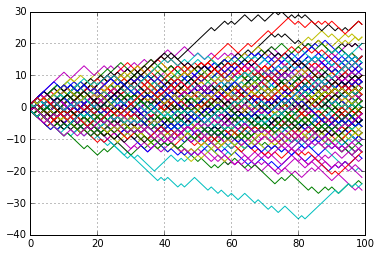

In [170]:
endpoints = []
for k in range(180):
    particularWalk = RandomWalk(100,1)
    endpoints.append(particularWalk[1][-1])
    plt.plot(particularWalk[0], particularWalk[1])
grid(True)
plt.show()

(array([  4.,   4.,  12.,  21.,  30.,  44.,  39.,  12.,  10.,   4.]),
 array([-26. , -20.8, -15.6, -10.4,  -5.2,   0. ,   5.2,  10.4,  15.6,
         20.8,  26. ]),
 <a list of 10 Patch objects>)

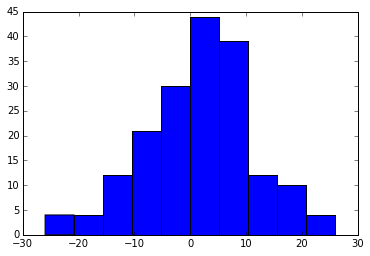

In [171]:
# with 180 start getting something 'more normal'
plt.hist(endpoints)

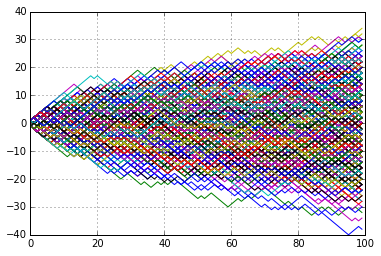

In [172]:
endpoints = []
for k in range(1800):
    particularWalk = RandomWalk(100,1)
    endpoints.append(particularWalk[1][-1])
    plt.plot(particularWalk[0], particularWalk[1])
grid(True)
plt.show()

(array([   3.,   22.,   59.,  248.,  369.,  546.,  381.,  116.,   47.,    9.]),
 array([-38. , -30.8, -23.6, -16.4,  -9.2,  -2. ,   5.2,  12.4,  19.6,
         26.8,  34. ]),
 <a list of 10 Patch objects>)

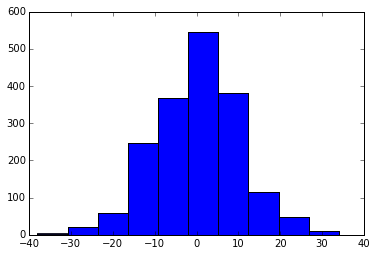

In [173]:
# with 1800 looks very normal
plt.hist(endpoints)

In [174]:
# standard deviation of endpoints at time 100
np.var(endpoints)
# for this simple symmetric random walk, look how close variance is to time.

103.50912469135801

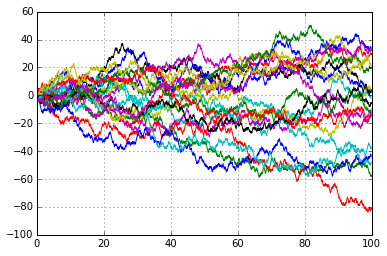

In [175]:
# Let's scale this random walk in TIME but not DISTANCE. 
#Here we do 20 trials, with 400 steps each (ten steps per unit time, so delta = .1)
# each step is still of size one
endpoints = []
for k in range(20):
    particularWalk = RandomWalk(100,0.1)
    endpoints.append(particularWalk[1][-1])
    plt.plot(particularWalk[0], particularWalk[1])
grid(True)
plt.show()
# Notice the vertical scale (distance). We get farther from the origin in the same amount of time. 

(array([ 1.,  0.,  2.,  2.,  0.,  2.,  3.,  4.,  2.,  4.]),
 array([-82. , -70.4, -58.8, -47.2, -35.6, -24. , -12.4,  -0.8,  10.8,
         22.4,  34. ]),
 <a list of 10 Patch objects>)

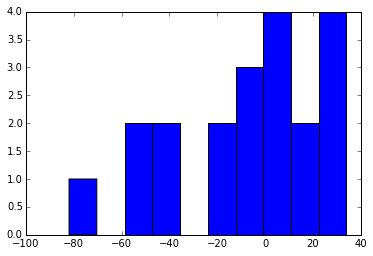

In [176]:
# the variance is bigger, too
plt.hist(endpoints)

In [177]:
np.var(endpoints)
# variance has totally blown up: at time 100 we want variance close to 100. Play with the step size delta and see what happens.


1022.5100000000002

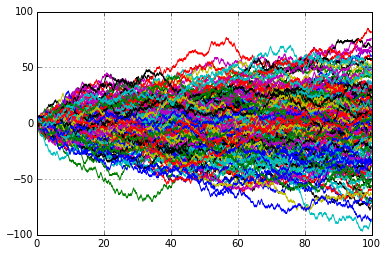

In [178]:
# Still scaling this random walk in TIME but not DISTANCE. 
# Here we do 200 trials, with 400 steps each (ten steps per unit time, so delta = .1)
# each step is still of size one
# Now do 1800 of them.
endpoints = []
for k in range(200):
    particularWalk = RandomWalk(100,0.1)
    endpoints.append(particularWalk[1][-1])
    plt.plot(particularWalk[0], particularWalk[1])
grid(True)
plt.show()
# Notice the vertical scale (distance). We get farther from the origin in the same amount of time. 

In [180]:
# standard deviation of endpoints at time 100
np.var(endpoints)
# Notice this variance is still crazy big!

1009.4479000000001

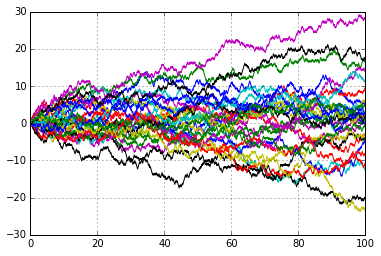

In [181]:
# Let's scale this random walk in TIME *AND* DISTANCE. 
# Here we do 20 trials, with 400 steps each (ten steps per unit time, so delta = .1)
# each step is of size sqrt(delta), so they are much smaller steps than the length 1 steps we took before
endpoints = []
for k in range(30):
    particularWalk = RandomWalk(100,0.1)
    # unscaled above, scaled below
    endpoints.append(np.sqrt(0.1)*particularWalk[1][-1])
    plt.plot(particularWalk[0], np.sqrt(0.1)*particularWalk[1])
grid(True)
plt.show()

(array([  2.,   0.,   3.,   4.,  11.,   4.,   2.,   3.,   0.,   1.]),
 array([-22.76839915, -17.7087549 , -12.64911064,  -7.58946638,
         -2.52982213,   2.52982213,   7.58946638,  12.64911064,
         17.7087549 ,  22.76839915,  27.82804341]),
 <a list of 10 Patch objects>)

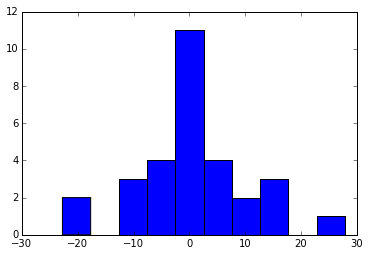

In [182]:
# look at the histogram of endpoints
plt.hist(endpoints)

In [183]:
# and look at its stdev:
np.var(endpoints)
# much closer to variance/stdev of original simple symmetric random walk; much closer to time! (closer to 100 than prev)

105.76933333333334

# Asymmetric random walks

In [184]:
# This random walk doesn't change step size, but changes the probability of one direction vs another
# Think of flipping an unfair coin
def AsymmRandomWalk(N,delta):
    walk_dist = np.cumsum(2*np.random.binomial(1,.55,N/delta)-1)
    walk_time = np.arange(0,N, delta)
    return (walk_time, walk_dist)


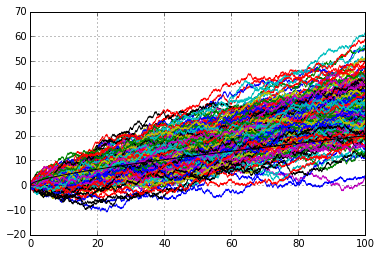

In [185]:
endpoints = []
for k in range(180):
    particularWalk = AsymmRandomWalk(100,0.1)
    # unscaled above, scaled below
    endpoints.append(np.sqrt(0.1)*particularWalk[1][-1])
    plt.plot(particularWalk[0], np.sqrt(0.1)*particularWalk[1])
grid(True)
x=np.arange(0,100,.5)
y=np.sqrt(4*.45*.55*x)+.1*x
plt.plot(x,y, color='k')
plt.show()

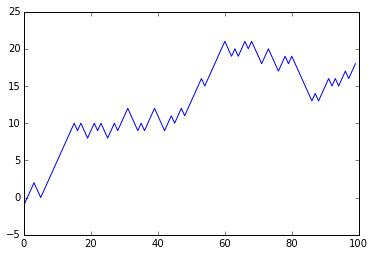

In [186]:
particularWalk = AsymmRandomWalk(100,1)
plt.plot(particularWalk[0],particularWalk[1])
plt.show()

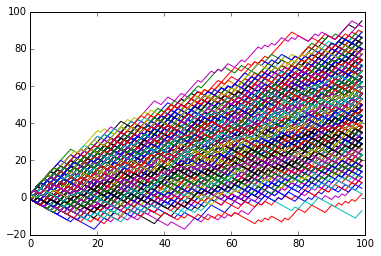

In [33]:

# Here just playing with a shift of 3X-1 from binomial; no other scaling
def WeirdRandomWalk(N,d):
    walk = np.cumsum(3*np.random.binomial(1,.5,N)-1)
    return walk
endpoints = []
for k in range(2000):
    particularWalk = WeirdRandomWalk(100,1)
    endpoints.append(particularWalk[-1])
    plt.plot(np.arange(100),particularWalk)

(array([   3.,   12.,   81.,  191.,  367.,  575.,  405.,  270.,   78.,   18.]),
 array([ -7. ,   3.2,  13.4,  23.6,  33.8,  44. ,  54.2,  64.4,  74.6,
         84.8,  95. ]),
 <a list of 10 Patch objects>)

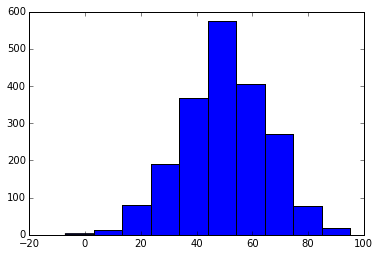

In [34]:
plt.hist(endpoints)

In [35]:
endpoints = []
for k in range(20000):
    particularWalk = WeirdRandomWalk(100,1)
    endpoints.append(particularWalk[-1])

(array([   33.,   302.,  1529.,  4178.,  4677.,  5644.,  2738.,   784.,
          108.,     7.]),
 array([  -4. ,    7.4,   18.8,   30.2,   41.6,   53. ,   64.4,   75.8,
          87.2,   98.6,  110. ]),
 <a list of 10 Patch objects>)

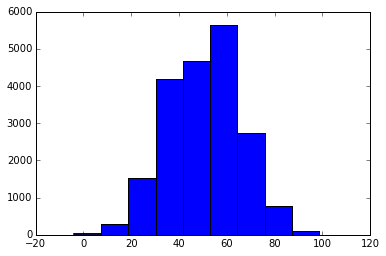

In [36]:
plt.hist(endpoints)